In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import fsolve

$\cdot$ The coefficients $a_i, b_i,c_i,d_i$ are generated randomly with uniform distribution on $[0,2], [-2,2], [-10,10], [-10,10]$ respectively.

In [22]:
# N = 6 # number of blocks
N = 20 # number of blocks
a = np.random.uniform(0,2, size = (N,)) # a: N x 1
b = np.random.uniform(-2,2, size = (N,)) # b: N x 1
c = np.random.uniform(-10,10, size = (N,)) # c: N x 1
d = np.random.uniform(-10,10, size = (N,)) # d: N x 1

Since $P_i$ is positive semidefinite matrix, we generate random positive values.

In [23]:
P = np.random.rand(N) 
print(P)

[0.39382077 0.7749852  0.69382277 0.782901   0.95720901 0.46823377
 0.68109633 0.22267056 0.44738614 0.60102901 0.78948911 0.83862065
 0.63646953 0.27650746 0.41037412 0.69108007 0.46813929 0.20858382
 0.65076794 0.93752464]


$\rho >0$, $0 < \gamma < 2$

In [24]:
# rho_array = np.array([0.1, 1, 5, 10])
rho_array = np.array([0.03, 1, 5, 10])
gamma_array = np.array([0.1, 0.5, 1.5, 1.9])

We update $x_i^k$ using $\big(a_i + P_i +\rho \big)x_i^{k+1} + \frac{b_i exp\Big[b_i\big( x_i^{k+1}-d_i\big)\Big]}{1+exp\left[b_i\big( x_i^{k+1}-d_i\big)\right]} + \rho \Big(\sum_{j=1}^N x_j^k - x_i^k -\frac{\lambda^k}{\rho} \Big) - P_i x_i^k = 0$. To solve this nonlinear equation, we use the **fsolve** function from Python's **scipy** library, providing a initial guess for $x_i^{k+1}$ to ensure convergence. 

In [25]:
def update_x(x_next, x_current, rho, a, b, c, d, P, lamb, x_total): # x: x_i^{k+1} , x_k: x_i^k, total_x: 
    return (a+P+rho)*x_next + (b*np.exp(b*(x_next-d)))/(1+np.exp(b*(x_next-d)))+ rho*(np.sum(x_total)-x_current-c-lamb/rho)-P*x_current

We update $\lambda^k$ using $\lambda^{k+1} = \lambda^k -\gamma \rho \sum_{i=1}^N x_i^{k+1}$.

In [26]:
def update_lambda(lamb, gma, rho, x_total):
    return lamb - gma*rho*np.sum(x_total)

The value $u^* = \big(x_1^*, \ldots, x_n^* ; \lambda^*\big)$ is obtained by running Algorithm for $5,000$ iterations. All the working variables are initialized with zero for all the test algorithms.

In [27]:
Total_iter = 4000
dist_list = np.zeros([Total_iter, len(rho_array), len(gamma_array)])

In [28]:
for r in range(len(rho_array)):
    for g in range(len(gamma_array)):
        initial_guess_x = 0.0 # initial guess for x

        #We first obtain an exact solution. 
        x0 = np.zeros(N)
        lamb0 = np.zeros(1)

        x = x0 # initialization
        lamb = lamb0 # initialization
        x_prior = np.zeros(N)
        
        for iter in range(Total_iter):
            for l in range(N): # update x of each block at iteration k
                x[l] = fsolve(update_x, initial_guess_x
                        , args = (x[l], rho_array[r], a[l], b[l], c[l], d[l], P[l], lamb, x_prior)) # update each block at iteration k
            lamb = update_lambda(lamb, gamma_array[g], rho_array[r], x) # update lambda at iteration k
            x_prior = x
            
        # u_true = u
        #-----------------------------------------------------------------------------------------------------------------
        #Now we repeat the above procedure to find the error for the optimization
        x0 = np.zeros(N)
        lamb0 = np.zeros(1)
        
        #We let above value of x and lambda optimal value.
        x_opt = x
        lamb_opt = lamb
        
        x = x0 # initialization
        lamb = lamb0 # initialization
        x_prior = np.zeros(N)
        
        for iter in range(Total_iter):
            for l in range(N): # update x of each block at iteration k
                x[l] = fsolve(update_x, initial_guess_x
                        , args = (x[l], rho_array[r], a[l], b[l], c[l], d[l], P[l], lamb, x_prior)) # update each block at iteration k
                dist_list[iter, r, g] = max(dist_list[iter, r, g], np.linalg.norm(x[l]-x_opt[l]))

            lamb = update_lambda(lamb, gamma_array[g], rho_array[r], x) # update lambda at iteration k
            dist_list[iter, r, g] = max(dist_list[iter, r, g], np.linalg.norm(lamb-lamb_opt))
            x_prior = x
            
            if iter % 100 == 0:
                print(dist_list[iter, r, g])

C:\Users\hyelinchoi\AppData\Local\Temp\ipykernel_36944\3734629312.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[l] = fsolve(update_x, initial_guess_x
C:\Users\hyelinchoi\AppData\Local\Temp\ipykernel_36944\3734629312.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[l] = fsolve(update_x, initial_guess_x


1.0537341568935916
0.010335242385248189
0.00013422679660668457
1.7432251954163647e-06
2.2639544017266644e-08
2.940215848568073e-10
3.816835736358826e-12
4.785061236134425e-14
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
1.0537341568935907
7.194245199571014e-14
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


C:\Users\hyelinchoi\AppData\Local\Temp\ipykernel_36944\3734629312.py:15: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  x[l] = fsolve(update_x, initial_guess_x


132.73650395601575


C:\Users\hyelinchoi\AppData\Local\Temp\ipykernel_36944\3734629312.py:36: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  x[l] = fsolve(update_x, initial_guess_x


11.608767959647622
3.723518220773613
0.48150586052675237
0.15899191452075456
0.01988258485954475
0.006753525158202933
0.0008162623202565555
0.0002854105713225863
3.330575438553751e-05
1.2000291448543976e-05
1.4626963036334928e-06
5.019630009428511e-07
6.647067607445933e-08
2.0886247398266278e-08
2.9913849175500218e-09
8.643183946333011e-10
1.3372414287005085e-10
3.565503448044183e-11
5.6559201766503975e-12
1.5063505998114124e-12
5.968558980384842e-13
3.1086244689504383e-15
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
132.7365039560159
11.33878694883471
3.6112809175551774
0.4545032665597404
0.15009278090380462
0.018061624724182934
0.00618383356088259
0.0007104699498228229
0.00025257769726749757
3.139600786994379e-05
1.0226305420246717e-05
1.411300189602116e-06
4.1030571651390346e-07
6.247938699743827e-08
1.6306458405779267e-08
2.7297915039525833e-09
6.414637709895032e-10
1.1797851584560703e-10
2.496847173460992e-11
4.831690603168681e-12
8.526512829121202e-13
2.131

We generates plots showing the change in the distance $\text{Dis}(u^k)$ for different values of $\rho$ (i.e., {0.1, 1.0, 5.0, 10.0}) at a fixed value of $\gamma$. 

Saved: plots_ORAP_N=20\ORAP_plot_N=20_gamma_0.1.png


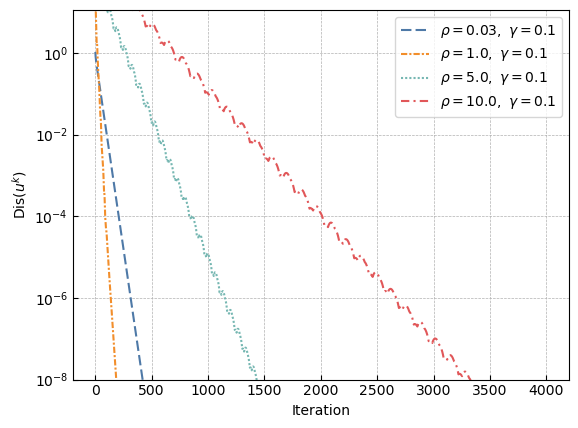

Saved: plots_ORAP_N=20\ORAP_plot_N=20_gamma_0.5.png


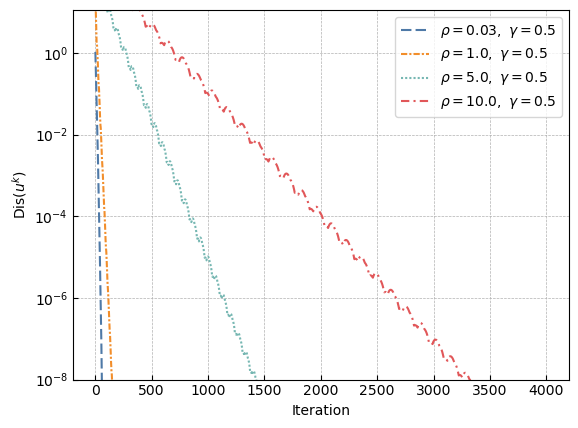

Saved: plots_ORAP_N=20\ORAP_plot_N=20_gamma_1.5.png


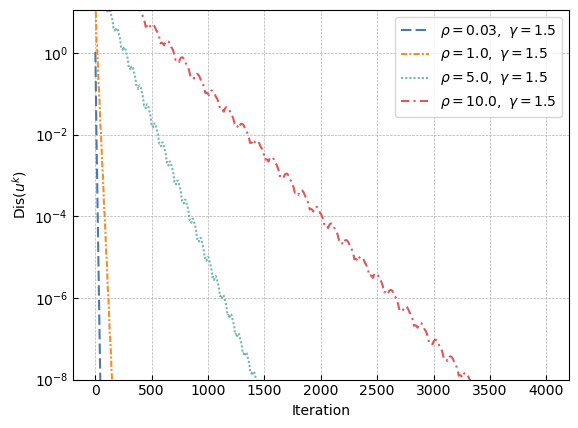

Saved: plots_ORAP_N=20\ORAP_plot_N=20_gamma_1.9.png


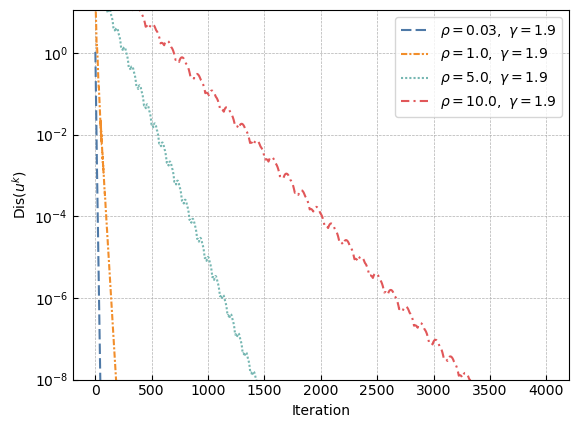

In [31]:
output_dir = f"plots_ORAP_N={N}"
os.makedirs(output_dir, exist_ok=True)

x = np.arange(1, Total_iter + 1)

color_list = ['#4E79A7', '#F28E2B', '#76B7B2', '#E15759']
# linestyle_list = ['-', '--', '-.', ':']
linestyle_list = [
    (0, (5, 2)),       # 긴 대시
    (0, (3, 1, 1, 1)), # 짧은 대시-점
    (0, (1, 1)),       # 짧은 점선
    (0, (4, 2, 1, 2))  # 긴 대시-점
]

for gam in range(len(gamma_array)):
    plt.figure()
    for rho in range(len(rho_array)):
        y = dist_list[:, rho, gam]
        plt.yscale('log')
        # plt.xlim(None, 1000)
        plt.ylim(10**(-8), None)
        plt.xlabel('Iteration')
        plt.ylabel(r'Dis$(u^k)$')

        color = color_list[rho % len(color_list)]
        linestyle = linestyle_list[rho % len(linestyle_list)]
        # marker = marker_list[gam & len(marker_list)]

        plt.plot(x, y, color=color, linestyle=linestyle,  
                label=r'$\rho = {}, ~ \gamma = {}$'.format(rho_array[rho], gamma_array[gam]))
    plt.grid(which='both', linestyle='--', linewidth=0.5)

    plt.legend()

    # x, y 축의 눈금 방향 조절
    plt.tick_params(axis='x', direction='in')
    plt.tick_params(axis='y', direction='in')

    # filename = os.path.join(output_dir, f"plot_N={N}_rho_{rho_array[rho]}.png")
    filename = os.path.join(output_dir, f"ORAP_plot_N={N}_gamma_{gamma_array[gam]}.png")
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"Saved: {filename}")

    plt.show()

We generate plots showing the change in the distance $\text{Dis}(u^k)$ for different values of $\gamma$ (i.e., {0.5, 1.0, 1.5, 1.9}) at a fixed value of $\rho$ (i.e., {0.1, 5.0}).


Saved: plots_ORAP_N=20\ORAP_plot_N=20_rho_0.03.png


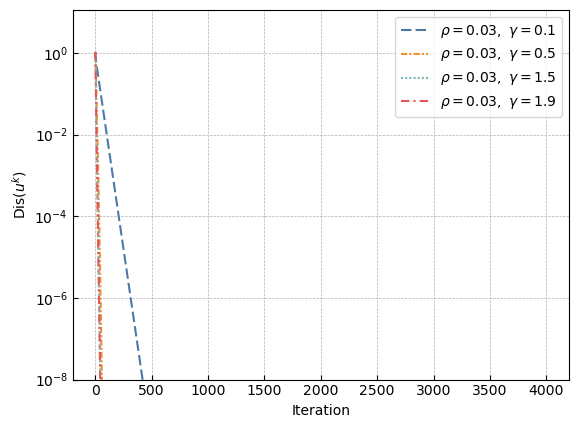

Saved: plots_ORAP_N=20\ORAP_plot_N=20_rho_5.0.png


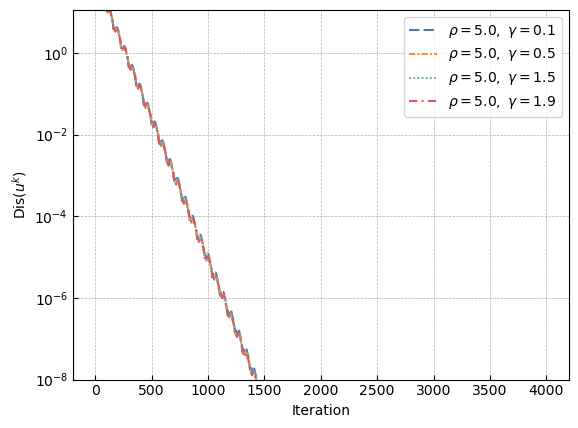

In [33]:
for rho in range(0, len(rho_array), 2):
    plt.figure()
    for gam in range(len(gamma_array)):
        y = dist_list[:, rho, gam]
        plt.yscale('log')
        plt.ylim(10**(-8), None)
        plt.xlabel('Iteration')
        plt.ylabel(r'Dis$(u^k)$')

        color = color_list[gam % len(color_list)]
        linestyle = linestyle_list[gam % len(linestyle_list)]

        plt.plot(x, y, color=color, linestyle=linestyle,  
                label=r'$\rho = {}, ~ \gamma = {}$'.format(rho_array[rho], gamma_array[gam]))
    plt.grid(which='both', linestyle='--', linewidth=0.5)

    plt.legend()

    # x, y 축의 눈금 방향 조절
    plt.tick_params(axis='x', direction='in')
    plt.tick_params(axis='y', direction='in')

    filename = os.path.join(output_dir, f"ORAP_plot_N={N}_rho_{rho_array[rho]}.png")
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"Saved: {filename}")

    plt.show()
